In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('komen video anwar ibrahim.csv')

# Display basic information about the dataset
df.head()


,avatarThumbnail,cid,createTime,createTimeISO,diggCount,repliesToId,replyCommentTotal,submittedVideoUrl,comments,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7.470390e+18,1739336442,2025-02-12T05:00:42.000Z,2463,NaN,14,https://www.tiktok.com/@anwaribrahimofficial/v...,‘I’m surprised you trust my driving ‘🤣🤣🤣,6.831210e+18,anishamzahh,https://www.tiktok.com/@anwaribrahimofficial/v...
1,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7.470410e+18,1739340883,2025-02-12T06:14:43.000Z,1127,NaN,2,https://www.tiktok.com/@anwaribrahimofficial/v...,The Translator does not only translate the wor...,7.232560e+18,ore0_m1lk,https://www.tiktok.com/@anwaribrahimofficial/v...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7.470520e+18,1739365456,2025-02-12T13:04:16.000Z,111,NaN,3,https://www.tiktok.com/@anwaribrahimofficial/v...,long Life dear president off Muslim ummha 🥰🥰,6.788530e+18,bphabeb,https://www.tiktok.com/@anwaribrahimofficial/v...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7.470390e+18,1739336848,2025-02-12T05:07:28.000Z,140,NaN,0,https://www.tiktok.com/@anwaribrahimofficial/v...,This my PmX .❤️Great collaboration Malaysia & ...,7.023330e+18,_almifairuz,https://www.tiktok.com/@anwaribrahimofficial/v...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7.470410e+18,1739339448,2025-02-12T05:50:48.000Z,34,NaN,1,https://www.tiktok.com/@anwaribrahimofficial/v...,Allah bless both PM❤❤❤❤❤,7.088090e+18,yuhana.y,https://www.tiktok.com/@anwaribrahimofficial/v...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avatarThumbnail    300 non-null    object 
 1   cid                300 non-null    float64
 2   createTime         300 non-null    int64  
 3   createTimeISO      300 non-null    object 
 4   diggCount          300 non-null    int64  
 5   repliesToId        0 non-null      float64
 6   replyCommentTotal  300 non-null    int64  
 7   submittedVideoUrl  300 non-null    object 
 8   comments           300 non-null    object 
 9   uid                300 non-null    float64
 10  uniqueId           300 non-null    object 
 11  videoWebUrl        300 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 28.3+ KB


### Summary of the CSV File:

#### Total Comments: 300

#### Columns:
avatarThumbnail: URL of the commenter's profile picture.                
cid: Unique comment ID.               
createTime & createTimeISO: Timestamp of when the comment was posted.                
diggCount: Number of likes/upvotes on the comment.                  
repliesToId: Indicates if the comment is a reply (all values are NaN, meaning no replies).                  
replyCommentTotal: Number of replies to the comment.                        
submittedVideoUrl: URL of the video the comment was posted on.                   
comments: The actual text of the comment.                 
uid: Unique user ID of the commenter.               
uniqueId: Commenter's TikTok username.                    
videoWebUrl: URL to the video on TikTok.

### Observations:
The dataset contains comments related to a video posted by Anwar Ibrahim.           
Some comments have a high number of likes (diggCount), indicating engagement.                
repliesToId is entirely NaN, meaning no comment is a reply.                
The comments contain a mix of reactions, including humor, support, and admiration.

### Sentiment Analysis

In [21]:
from textblob import TextBlob

# Bersihkan dan analisis sentimen pada komen
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Tukar ke string untuk elak error jika ada nilai NaN
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Tambah lajur sentimen ke dalam DataFrame
df["sentiment"] = df["comments"].apply(get_sentiment)

# Paparkan ringkasan keputusan
df["sentiment"].value_counts()

sentiment
Neutral     155
Positive    139
Negative      6
Name: count, dtype: int64

In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Muat turun VADER lexicon
nltk.download("vader_lexicon")

# Inisialisasi analyzer
sia = SentimentIntensityAnalyzer()

# Contoh analisis sentimen menggunakan VADER
def get_vader_sentiment(text):
    scores = sia.polarity_scores(str(text))  # Pastikan teks adalah string
    if scores["compound"] >= 0.05:
        return "Positive"
    elif scores["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Gunakan ke atas dataset
df["vader_sentiment"] = df["comments"].apply(get_vader_sentiment)

# Paparkan ringkasan keputusan
print(df["vader_sentiment"].value_counts())


vader_sentiment
Neutral     149
Positive    146
Negative      5
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zuhairi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


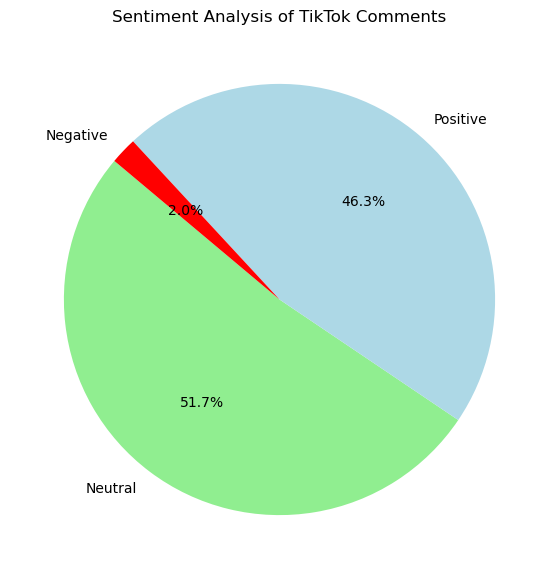

In [31]:
#Plot the Pie Chart
import matplotlib.pyplot as plt

# Kira jumlah setiap kategori sentimen
sentiment_counts = df["sentiment"].value_counts()

# Label dan saiz untuk pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["lightgreen", "lightblue", "red"]

# Lukis pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Sentiment Analysis of TikTok Comments")
plt.show()

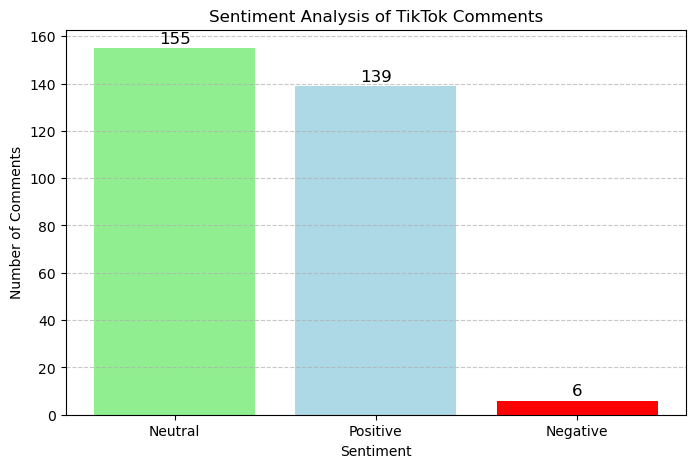

In [33]:
# bar chart for sentiment result
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["lightgreen", "lightblue", "red"])

# Tetapan label dan tajuk
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.title("Sentiment Analysis of TikTok Comments")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Paparkan nilai pada setiap bar
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 2, str(v), ha="center", fontsize=12)

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zuhairi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


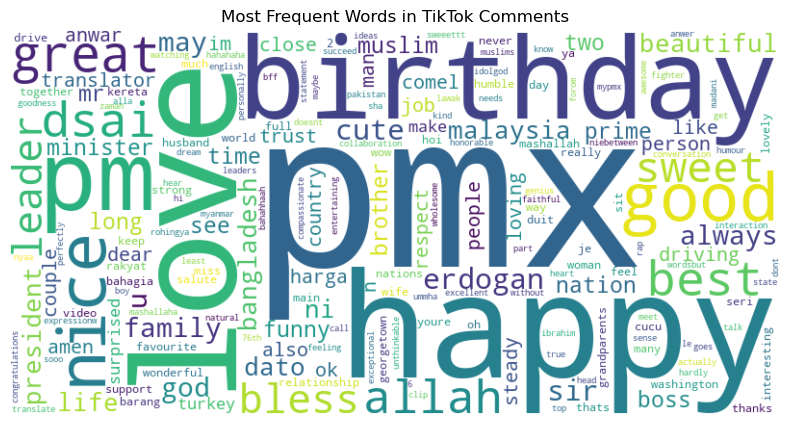

In [35]:
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Muat turun stopwords jika belum ada
nltk.download("stopwords")

# Senarai stopwords dalam Bahasa Melayu & Inggeris
stop_words = set(stopwords.words("indonesian") + stopwords.words("english"))

# Gabungkan semua komen menjadi satu teks
all_text = " ".join(str(comment) for comment in df["comments"].dropna())

# Bersihkan teks (buang tanda baca dan tukar ke huruf kecil)
all_text_cleaned = re.sub(r"[^\w\s]", "", all_text.lower())

# Pisahkan perkataan dan tapis stopwords
words = [word for word in all_text_cleaned.split() if word not in stop_words]

# Kira kekerapan perkataan
word_freq = Counter(words)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Paparkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in TikTok Comments")
plt.show()


In [37]:
# Function to clean text (remove special characters and convert to lowercase)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()

# Sentiment analysis using TextBlob
df["sentiment"] = df["comments"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment as Positive, Neutral, or Negative
df["sentiment_label"] = df["sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Extract keywords from all comments
all_words = " ".join(df["comments"].dropna().apply(clean_text)).split()
word_counts = Counter(all_words)

# Get the top 10 most common words (excluding stop words)
common_words = word_counts.most_common(10)

# Sentiment distribution
sentiment_counts = df["sentiment_label"].value_counts()

common_words, sentiment_counts


([('pmx', 43),
  ('you', 30),
  ('the', 30),
  ('my', 26),
  ('happy', 26),
  ('love', 25),
  ('and', 23),
  ('so', 21),
  ('birthday', 21),
  ('a', 20)],
 sentiment_label
 Neutral     155
 Positive    139
 Negative      6
 Name: count, dtype: int64)

### Sentiment Analysis Results:
Positive Comments: 139   
Neutral Comments: 155  
Negative Comments: 6        
The majority of the comments are either neutral or positive, with very few negative remarks.

Keyword Extraction (Top 10 Most Common Words):        
pmx (43 times) – Likely referring to "Prime Minister X" (Anwar Ibrahim).         
you (30)             
the (30)                
my (26)             
happy (26) – Indicates celebratory or supportive messages.              
love (25) – Suggests admiration or positive sentiment.             
and (23)              
so (21)             
birthday (21) – Suggests many users were wishing someone a happy birthday.                  
a (20)             

### Insights:            
The presence of "PMX" suggests the discussion is centered around Anwar Ibrahim.           
Words like "happy" and "love" suggest a largely supportive audience.            
"Birthday" appears frequently, possibly indicating the video was related to a birthday celebration.               

In [41]:
# Top 10 most liked comments (sorted by diggCount)
top_liked_comments = df[['comments', 'diggCount']].sort_values(by='diggCount', ascending=False).head(10)

# Top 10 users with the most engagement (highest replyCommentTotal)
top_engaged_users = df[['uniqueId', 'replyCommentTotal']].sort_values(by='replyCommentTotal', ascending=False).head(10)

top_liked_comments, top_engaged_users


(                                              comments  diggCount
 212  semoga DSAi diberikan kesihatan yg baik buat k...      13076
 211  balik keje sambung main ngn cucu plk.. ank mud...       9722
 213             Lagu hoi hoi yahoi sekali dato seri...       7214
 214    epf lulus kan la..nak guna duit ni dato seri🥺🥺🥺       4873
 249                               Ya Allah comel dato😅       3405
 252     sweet lah atok ni...semoga dsai sentiasa sihat       3013
 0             ‘I’m surprised you trust my driving ‘🤣🤣🤣       2463
 248  harga barang melambung lambung ni dato oiiii.....       1998
 250  senang nya hati org kaya😁.. kami ni hanya dapa...       1505
 296   🥰🥰🥰aku sgt bahagia lihat kemesraan pmx n erdogan       1404,
              uniqueId  replyCommentTotal
 213  warisannakhoda90                230
 251        alang_1010                176
 211        daddyrawrr                149
 214         nazri9185                146
 248       ummirosse87                144
 253    mo

### Top 10 Most Liked Comments:   
"Semoga DSAI diberikan kesihatan yg baik buat keluarga dan rakyat" – 13,076 likes (Wishing Anwar Ibrahim good health).      
"Balik keje sambung main ngn cucu plk.. ank muda pun kalah tenaga dia" – 9,722 likes (Admiration for his energy).          
"Lagu hoi hoi yahoi sekali dato seri..." – 7,214 likes (Reference to a song).          
"EPF lulus kan la.. nak guna duit ni dato seri 🥺🥺🥺" – 4,873 likes (Request related to EPF withdrawals).            
"Ya Allah comel dato 😅" – 3,405 likes (Calling him cute).              
"Sweet lah atok ni... semoga DSAI sentiasa sihat" – 3,013 likes (Calling him sweet, wishing good health).           
"'I’m surprised you trust my driving' 🤣🤣🤣" – 2,463 likes (Humorous remark).             
"Harga barang melambung lambung ni dato oiiii....." – 1,998 likes (Concern over rising prices).            
"Senang nya hati org kaya 😁.. kami ni hanya dapat lihat je" – 1,505 likes (Comment on wealth disparity).              
"🥰🥰🥰 Aku sgt bahagia lihat kemesraan PMX n Erdogan" – 1,404 likes (Happiness over PMX and Erdogan's bond).             

### Top 10 Most Engaged Users (Most Replies Received):    
@warisannakhoda90 – 230 replies        
@alang_1010 – 176 replies              
@daddyrawrr – 149 replies              
@nazri9185 – 146 replies              
@ummirosse87 – 144 replies              
@mohd_lokman_98 – 143 replies             
@..j..7..5 – 128 replies              
@remybankster – 76 replies              
@juhira.mohammed – 61 replies               
@sinchan.king – 41 replies               

### Key Insights:        
The most liked comments express support, humor, admiration, or concerns (EPF withdrawal, rising prices).         
The most engaged users likely posted controversial or highly discussed comments.